# Project: Investigating Trends in Gun Sales in the US

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

The Brady Handgun Violence Prevention Act of 1993 introduced a mandate that Federal background checks be performed prior to the sale of firearms in the US. This led to the launch in 1998 of the FBI National Instant Criminal Background Check System (NICS), a system for conducting background checks to determine a persons eligibility to purchase a firearm. In this project, I will be examining the numbers of NICS background checks that have been performed related to the sales of firearms between January, 2010 and November, 2018. This information will then be compared with information regarding state demographics from the Census Bureau's most recent census information from 2010, 2015, and 2016 to determine if any correlations can be found between state demographics and NICS background checks. I will also be investigating any connection between the instance of mass shootings in the US and nationwide NICS background checks.

The specific questions that will be investigated are:

Is there a correlation between veteran population and NICS background checks?

Is there a correlation between foreign born population and NICS background checks?

Is there a correlation between education level and NICS background checks?

Is there a correlation between economic status and poverty and NICS background checks?

Is there a correlation between mass shootings in the US and NICS background checks?

How many NICS background checks are the result of each category of firearm since 2010?

Disclaimer: The NICS background check information will be used as a measure of firearms sales in the US for this project. However, this NICS information is not necessarily a direct measure of firearms sales as not all NICS checks lead to an actual sale. There are also laws varying from state to state regarding the private sales of firearms so not all sales will result in a NICS check.

In [293]:
# Importing Packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

For this project, I used the most up to date FBI NICS data optained from the BuzzFeedNews nics-firearm-background-checks GitHub repository rather than the older version of the data. This data can be found here https://github.com/BuzzFeedNews/nics-firearm-background-checks.

The census data was obtained from https://d17h27t6h515a5.cloudfront.net/topher/2017/November/5a0a554c_u.s.-census-data/u.s.-census-data.csv.

I also included a data set on mass shootings in the US obtained from MotherJones here https://www.motherjones.com/politics/2012/12/mass-shootings-mother-jones-full-data/.

The data files were loaded into dataframes and inspected using a function to display the first few rows, the shape of the dataframe, some descriptive statistics of the data, information about the labels and types, and to determine if any data is missing or duplicated.



### General Properties

In [294]:
# Load CSV files as data frames

df_gun = pd.read_csv('gun_data.csv')
df_census = pd.read_csv('census_data.csv')
df_shootings = pd.read_csv('shootings_data.csv')

In [295]:
# Transpose census data to match gun data layout

df_census = df_census.transpose();

In [296]:
# Define function to inspect data frames. Prints first few lines, determines size/shape of data frame,
# shows descriptive statistics, shows data types, shows missing or incomplete data, check for duplicate data.

def inspect_df(df):
    print('Header:')
    print('{}'.format(df.head()))
    print()
    print('Shape: {}'.format(df.shape))
    print()
    print('Statistics:')
    print('{}'.format(df.describe()))
    print()
    print('Info:')
    print('{}'.format(df.info()))
    print()
    print('Duplicates: {}\n'.format(sum(df.duplicated())))


In [297]:
# Inspect gun data using inspect_df function.

inspect_df(df_gun)

Header:
     month       state   permit  permit_recheck  handgun  long_gun   other  \
0  2018-11     Alabama  22477.0            17.0   8408.0   10303.0   357.0   
1  2018-11      Alaska    184.0            11.0   2707.0    2827.0   360.0   
2  2018-11     Arizona   4537.0           380.0  12412.0    8886.0  1139.0   
3  2018-11    Arkansas   2739.0          1163.0   5739.0   10196.0   300.0   
4  2018-11  California  33942.0             0.0  36997.0   30913.0  3606.0   

   multiple  admin  prepawn_handgun   ...    returned_other  rentals_handgun  \
0      1153    0.0              3.0   ...               0.0              0.0   
1       197    0.0              0.0   ...               0.0              0.0   
2       879    0.0              9.0   ...               0.0              0.0   
3       914   60.0              9.0   ...               0.0              0.0   
4         0    0.0              0.0   ...               0.0              0.0   

   rentals_long_gun  private_sale_handgun 

In [298]:
# Inspect census data using inspect_df function.

inspect_df(df_census)

Header:
                                                     0   \
Fact       Population estimates, July 1, 2016,  (V2016)   
Fact Note                                           NaN   
Alabama                                       4,863,300   
Alaska                                          741,894   
Arizona                                       6,931,071   

                                                          1   \
Fact       Population estimates base, April 1, 2010,  (V2...   
Fact Note                                                NaN   
Alabama                                            4,780,131   
Alaska                                               710,249   
Arizona                                            6,392,301   

                                                          2   \
Fact       Population, percent change - April 1, 2010 (es...   
Fact Note                                                NaN   
Alabama                                                1.70%

In [299]:
# Inspect shootings data using inspect_df function.

inspect_df(df_shootings)

Header:
                               case     location     date  shootings
0           Mercy Hospital shooting     Illinois  2018-11          1
1  Thousand Oaks nightclub shooting   California  2018-11          1
2   Tree of Life synagogue shooting  Pensylvania  2018-10          1
3       Rite Aid warehouse shooting     Maryland  2018-09          1
4             T&T Trucking shooting   California  2018-09          1

Shape: (55, 4)

Statistics:
       shootings
count       55.0
mean         1.0
std          0.0
min          1.0
25%          1.0
50%          1.0
75%          1.0
max          1.0

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 4 columns):
case         55 non-null object
location     55 non-null object
date         55 non-null object
shootings    55 non-null int64
dtypes: int64(1), object(3)
memory usage: 1.8+ KB
None

Duplicates: 0



### Data Cleaning (Replace this with more specific notes!)

For the NICS data set, I decided to focus only on the data for background checks conducted for sales by Federal licensced firearms dealers. I chose not to use data about permits since the laws regarding permits and licensing vary greatly from state to state and thus are very inconsistent and not very enlightening. I also chose to ignore any background checks conducted by pawn shops or for firearm rentals since I wanted to focus only on sales. Background checks conducted by private sellers was also ignored since the regulations on private sales are very inconsistent in different states and therefor are not very meaningful. I also discarded all NICS data from "non-states" (Washington D.C., Guam, the Mariana Islands, Puerto Rico, and the Virgin Islands) since there is no corresponding data for the locales in the census data. I also trimmed the NICS data to focus only on background checks conducted from January, 2010 to present. After removing all unwanted data, the columns containing the numbers of background checks were converted to integer values only. I also created a new column "total" that shows the combined number of NICS background checks for all types of firearms by state each month as well as a new dataframe that shows the total NICS background checks by state from January, 2010 through November, 2018. I also created a new dataframe grouping combined states background checks by month for comparison with the shootings data.

For the census data, I transposed the dataframe so that the rows match those in the NICS dataframe, discarded the columns that I did not wish to explore, and renamed the remaining columns with simpler titles. I also dropped rows that did not contain any useful information, cleaned the data to remove any commas, dollar signs, or percent signs, and converted the columns to the apprpriate classes (either integers or floats). I also added two new columns, "adult population 2016", and "percent population veterans" to make my analysis easier.

For the shootings data I grouped by month to get shootings per month and renamed the columns. Then I joined the shooting data with the monthly gun data in a new dataframe. I grouped by month, dropped unwanted columns, replaced NaN values with 0's, and sorted by month.

In [300]:
# Drop unwanted columns from gun data.

df_gun = df_gun[['month','state', 'handgun', 'long_gun', 'other', 'multiple']]

In [301]:
# Drop unwanted rows (non-states) from gun data.

non_states = ['District of Columbia', 'Guam', 'Mariana Islands', 'Puerto Rico', 'Virgin Islands']
for non_state in non_states:
    df_gun = df_gun[df_gun['state']!= non_state]

In [302]:
# Trim data from before 2010.
drop_rows = np.r_[5350:12050]
df_gun.drop(df_gun.index[drop_rows], inplace=True)

In [303]:
# Convert all numbers to int in gun data.

int_columns = list(df_gun.columns[2:])
for col in int_columns:
    df_gun[col] = (df_gun[col].astype(int))

In [304]:
# Create new column for total NICS background checks by state each month.

df_gun['total'] = df_gun['handgun'] + df_gun['long_gun'] + df_gun['other'] + df_gun['multiple']
df_gun.head()

,month,state,handgun,long_gun,other,multiple,total
0,2018-11,Alabama,8408,10303,357,1153,20221
1,2018-11,Alaska,2707,2827,360,197,6091
2,2018-11,Arizona,12412,8886,1139,879,23316
3,2018-11,Arkansas,5739,10196,300,914,17149
4,2018-11,California,36997,30913,3606,0,71516


In [305]:
# Create new dataframe for total NICS background checks by state from 2010 to 2018 and add columns for percent of checks for
# handguns and long guns.

df_gun_total = df_gun.groupby(['state']).sum()
df_gun_total['percent handguns'] = ((df_gun_total['handgun'] / df_gun_total['total']) * 100).astype(float).round(2)
df_gun_total['percent long_guns'] = ((df_gun_total['long_gun'] / df_gun_total['total']) * 100).astype(float).round(2)
df_gun_total.head()

,handgun,long_gun,other,multiple,total,percent handguns,percent long_guns
state,,,,,,,
Alabama,1365431,1293826,42986,65474,2767717,49.33,46.75
Alaska,300604,326761,19497,19252,666114,45.13,49.05
Arizona,1199361,841046,72772,58213,2171392,55.23,38.73
Arkansas,597457,726279,16879,37535,1378150,43.35,52.70
California,3770517,3409235,394788,0,7574540,49.78,45.01


In [306]:
# Create new dataframe to show the total number of NICS checks by gun type since 2010.

a = sum(df_gun_total['handgun'])
b = sum(df_gun_total['long_gun'])
c = sum(df_gun_total['other'])
d = sum(df_gun_total['multiple'])
df_gun_sums = pd.DataFrame({'type': ['handgun', 'long_gun', 'other', 'multiple'], 'total': [a, b, c, d]})
df_gun_sums.head()

,total,type
0,54624965,handgun
1,50780105,long_gun
2,2520060,other
3,2063859,multiple


In [307]:
# Create new dataframe for total NICS background checks by month from 2010 to 2018.

df_gun_monthly = df_gun.groupby(['month']).sum().reset_index()
df_gun_monthly.head()

,month,handgun,long_gun,other,multiple,total
0,2010-01,288894,349482,4968,15939,659283
1,2010-02,359719,387092,5554,18596,770961
2,2010-03,367289,421136,5785,16815,811025
3,2010-04,313739,349245,4366,15411,682761
4,2010-05,274859,290315,3947,12003,581124


In [308]:
# Drop unwanted columns from census data.

df_census = df_census.iloc[:, np.r_[0, 6, 20:22, 34:36, 47, 49, 62]]

In [309]:
# Rename remaining columns in census data.

df_census.columns = ['population 2016', 'percent population under 18 2016', 'population veterans',
                     'percent population foreign born', 'percent population high school grad or higher',
                     'percent population bachelors or higher', 'median household income',
                     'percent population in poverty', 'population per sq mile']

In [310]:
# Drop unwanted rows from census data.

df_census.drop(['Fact','Fact Note'], axis=0, inplace=True)

In [311]:
# Remove all dollar signs, commas, and percent signs in census data.

df_census.replace(['\$',',','%'],['','',''], inplace=True, regex=True)
df_census.head()

,population 2016,percent population under 18 2016,population veterans,percent population foreign born,percent population high school grad or higher,percent population bachelors or higher,median household income,percent population in poverty,population per sq mile
Alabama,4863300,22.60,363170,3.50,84.30,23.50,43623,17.10,94.4
Alaska,741894,25.20,69323,7.40,92.10,28.00,72515,9.90,1.2
Arizona,6931071,23.50,505794,13.50,86.00,27.50,50255,16.40,56.3
Arkansas,2988248,23.60,220953,4.70,84.80,21.10,41371,17.20,56
California,39250017,23.20,1777410,27.00,81.80,31.40,61818,14.30,239.1


In [312]:
# Convert census data to appropriate data types.

float_nums = np.r_[0:8]
float_cols = list(df_census.columns[float_nums])
for col in float_cols:
    df_census[col] = (df_census[col].astype(float))
    
int_nums = np.r_[0, 2, 6]
int_cols = list(df_census.columns[int_nums])
for col in int_cols:
    df_census[col] = (df_census[col].astype(int))

In [313]:
# Add new columns to census data using other columns for calculations.

# Calculate adult population.
df_census['adult population 2016'] = ((((100 - df_census['percent population under 18 2016'])/100) * df_census['population 2016']).astype(int))

# Calculate % population veterans.
df_census['percent population veterans'] = (((df_census['population veterans'] / df_census['population 2016']) * 100).astype(float)).round(2)

df_census.head()

,population 2016,percent population under 18 2016,population veterans,percent population foreign born,percent population high school grad or higher,percent population bachelors or higher,median household income,percent population in poverty,population per sq mile,adult population 2016,percent population veterans
Alabama,4863300,22.6,363170,3.5,84.3,23.5,43623,17.1,94.4,3764194,7.47
Alaska,741894,25.2,69323,7.4,92.1,28.0,72515,9.9,1.2,554936,9.34
Arizona,6931071,23.5,505794,13.5,86.0,27.5,50255,16.4,56.3,5302269,7.30
Arkansas,2988248,23.6,220953,4.7,84.8,21.1,41371,17.2,56,2283021,7.39
California,39250017,23.2,1777410,27.0,81.8,31.4,61818,14.3,239.1,30144013,4.53


In [314]:
# Group shootings data by month and rename columns.

df_shootings = df_shootings.groupby(['date']).sum().reset_index()
df_shootings.columns = ['month', 'shootings']

In [315]:
# Join shootings dataframe with monthly gun dataframe, group by month, drop unwanted columns, replace nans with 0s,
# and sort by month.

df_shootings_monthly = pd.merge(df_shootings, df_gun_monthly, on='month', how='outer')
df_shootings_monthly.groupby(['month'])
df_shootings_monthly = df_shootings_monthly[['month', 'shootings']]
df_shootings_monthly.fillna(0, inplace=True)
df_shootings_monthly.sort_values(['month'], inplace=True)
df_shootings_monthly.head()

,month,shootings
43,2010-01,0.0
44,2010-02,0.0
45,2010-03,0.0
46,2010-04,0.0
47,2010-05,0.0


<a id='eda'></a>
## Exploratory Data Analysis


### Is there a correlation between military service and gun sales?

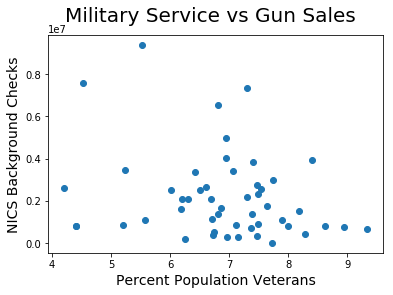

In [316]:
# Compare percent veteran population of states with NICS background checks.

fig = plt.figure()
plt.scatter(df_census['percent population veterans'], df_gun_total['total'])
fig.suptitle('Military Service vs Gun Sales', fontsize=20)
plt.xlabel('Percent Population Veterans', fontsize=14)
plt.ylabel('NICS Background Checks', fontsize=14);

There does not seem to be much of a correlation between a state's percent of population with military service and NICS checks. The data shows somewhat of a normal distribution with the possibility of a slight inverse relationship.

### Is there a correlation between amount of foreign born individuals and gun sales?

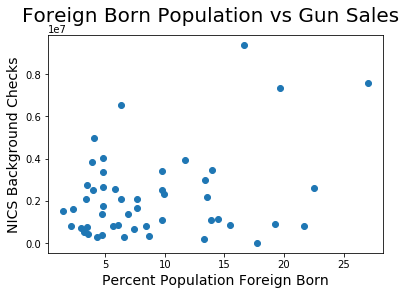

In [317]:
# Compare percent foreign born population of states with NICS background checks.

fig = plt.figure()
plt.scatter(df_census['percent population foreign born'], df_gun_total['total'])
fig.suptitle('Foreign Born Population vs Gun Sales', fontsize=20)
plt.xlabel('Percent Population Foreign Born', fontsize=14)
plt.ylabel('NICS Background Checks', fontsize=14);

There does not seem to be a correlation between a state's foreign born population and NICS checks, although the 3 states with the highest number of NICS checks do happen to have a high percentage of foreign born citizens.

### Is there a correlation between education level and gun sales?

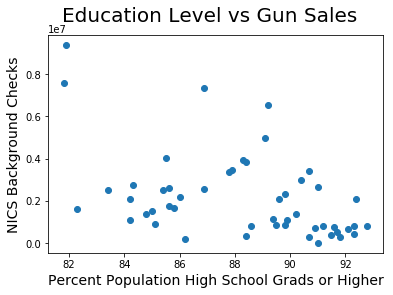

In [318]:
# Compare percent high school graduates with NICS background checks.

fig = plt.figure()
plt.scatter(df_census['percent population high school grad or higher'], df_gun_total['total'])
fig.suptitle('Education Level vs Gun Sales', fontsize=20)
plt.xlabel('Percent Population High School Grads or Higher', fontsize=14)
plt.ylabel('NICS Background Checks', fontsize=14);

There does not seem to be much of a correlation between a state's percentage of population with a high school education or higher and NICS checks, although the two states with the lowest percentage of high school graduates also happen to have the highest number of NICS checks.

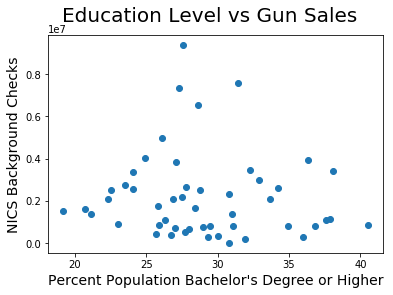

In [319]:
# Compare percent bachelors or higher with NICS background checks.

fig = plt.figure()
plt.scatter(df_census['percent population bachelors or higher'], df_gun_total['total'])
fig.suptitle('Education Level vs Gun Sales', fontsize=20)
plt.xlabel("Percent Population Bachelor's Degree or Higher", fontsize=14)
plt.ylabel('NICS Background Checks', fontsize=14);

There seems to be no correlation between a state's percentage of population with a college education and NICS checks, the data shows a fairly normal distribution.

### Is there a correlation between economic status and gun sales?

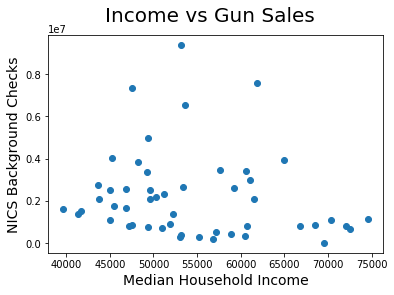

In [320]:
# Compare household income with NICS background checks.

fig = plt.figure()
plt.scatter(df_census['median household income'], df_gun_total['total'])
fig.suptitle('Income vs Gun Sales', fontsize=20)
plt.xlabel('Median Household Income', fontsize=14)
plt.ylabel('NICS Background Checks', fontsize=14);

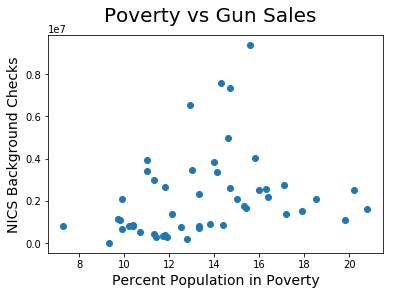

In [321]:
# Compare percent of population at poverty level with NICS background checks.

fig = plt.figure()
plt.scatter(df_census['percent population in poverty'], df_gun_total['total'])
fig.suptitle('Poverty vs Gun Sales', fontsize=20)
plt.xlabel('Percent Population in Poverty', fontsize=14)
plt.ylabel('NICS Background Checks', fontsize=14);

Neither a state's median household income, or the state's percent of population in poverty seem to have any correlation with NICS checks.

### Are gun sales affected by mass shootings?

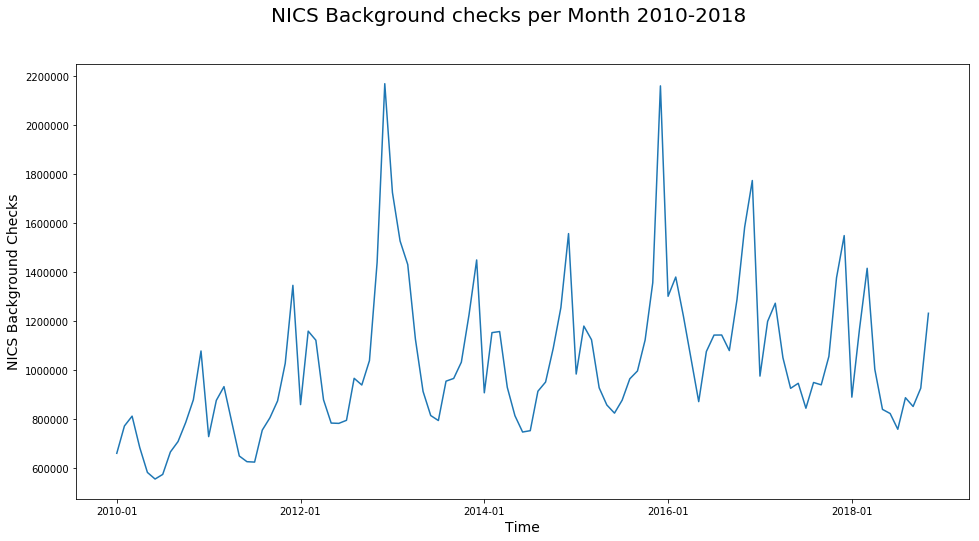

In [322]:
# Plot combined NICS background checks per month since 2010.

fig = plt.figure(figsize=(16, 8))
plt.plot(df_gun_monthly['month'],df_gun_monthly['total'])
plt.xticks(['2010-01', '2012-01', '2014-01', '2016-01', '2018-01'], ['2010-01', '2012-01', '2014-01', '2016-01', '2018-01'])
fig.suptitle('NICS Background checks per Month 2010-2018', fontsize=20)
plt.xlabel('Time', fontsize=14)
plt.ylabel('NICS Background Checks', fontsize=14);

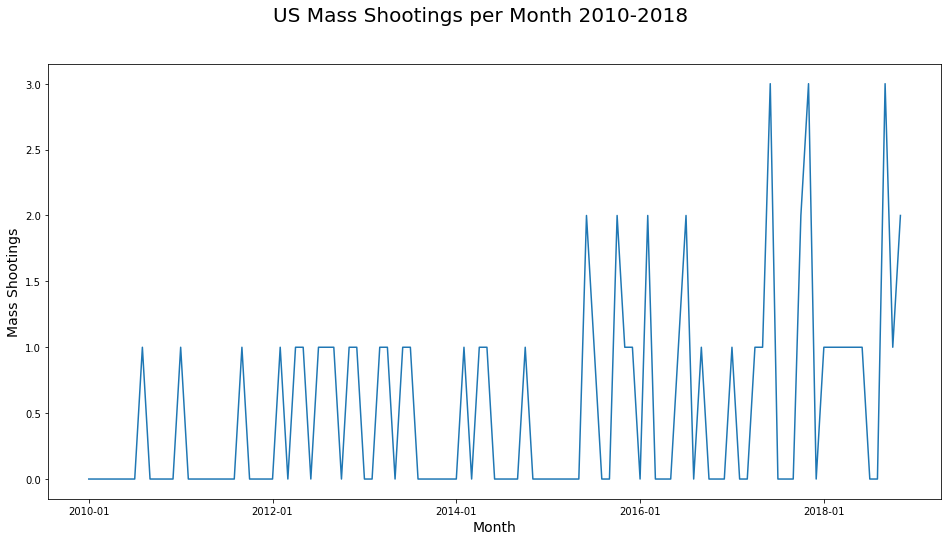

In [323]:
# Plot occurence of mass shootings monthly since 2010.

fig = plt.figure(figsize=(16, 8))
plt.plot(df_shootings_monthly['month'], df_shootings_monthly['shootings'])
plt.xticks(['2010-01', '2012-01', '2014-01', '2016-01', '2018-01'], ['2010-01', '2012-01', '2014-01', '2016-01', '2018-01'])
fig.suptitle('US Mass Shootings per Month 2010-2018', fontsize=20)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Mass Shootings', fontsize=14);

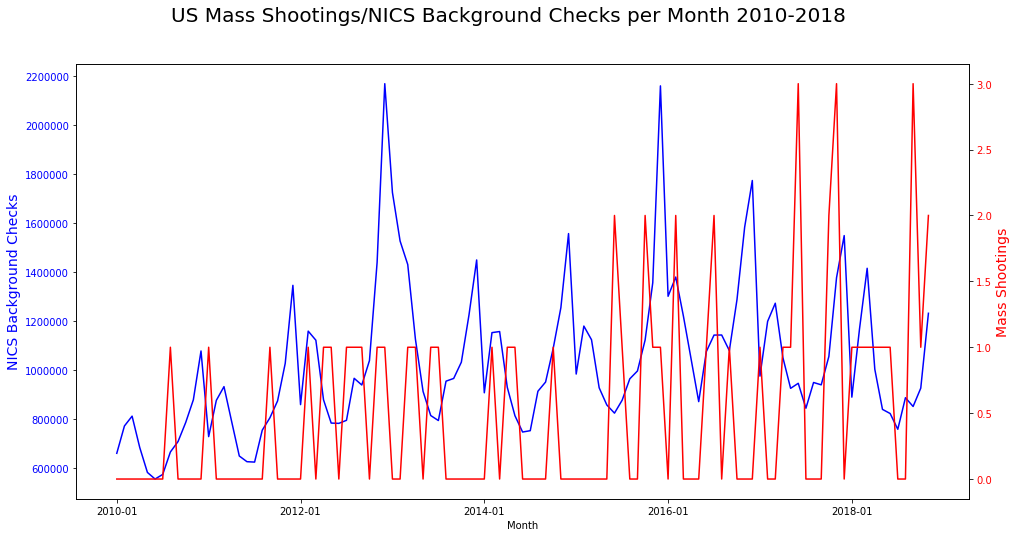

In [324]:
# Plot NICS monthly background checks data and US monthly mass shootings data together.

fig, ax1 = plt.subplots(figsize=(16, 8))
fig.suptitle('US Mass Shootings/NICS Background Checks per Month 2010-2018', fontsize=20)

color = 'blue'
ax1.set_xlabel('Month')
ax1.set_ylabel('NICS Background Checks', color=color, fontsize=14)
ax1.plot(df_gun_monthly['month'], df_gun_monthly['total'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'red'
ax2.set_ylabel('Mass Shootings', color=color, fontsize=14)
ax2.plot(df_shootings_monthly['month'], df_shootings_monthly['shootings'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.xticks(['2010-01', '2012-01', '2014-01', '2016-01', '2018-01'], ['2010-01', '2012-01', '2014-01', '2016-01', '2018-01']);

There often seems to be a reaction among people after mass shootings to move for stricter gun control laws. This in turn seems to lead to people rushing to purchase firearms before any new restrictions can prevent them from doing so. Comparing the instance of mass shootings in the US and the number of NICS checks nationwide monthly since 2010 shows that there may be some truth to this. It is not a perfect correlation, but there does seem to be a tendency for NICS checks to spike shortly after the occurence of mass shootings.

### How do sales of different types of guns compare since 2010?

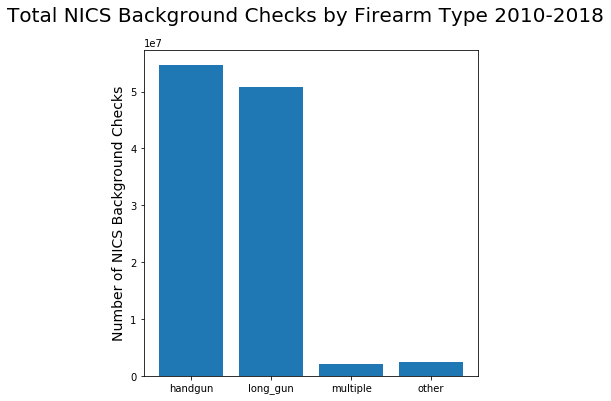

In [325]:
# Make chart of total number of NICS checks related to different gun categories since 2010.

fig = plt.figure(figsize=(6, 6))
plt.bar(df_gun_sums['type'], df_gun_sums['total'])
fig.suptitle('Total NICS Background Checks by Firearm Type 2010-2018', fontsize=20)
plt.ylabel('Number of NICS Background Checks', fontsize=14);

The number of checks related to handgun sales vs long gun sales is nearly the same with handguns being slightly greater. The number of checks related to "other" or "multiple" are both quite low compared with handguns and long guns.

<a id='conclusions'></a>
## Conclusions

In conclusion, there does not seem to be any significant correlation between any of the state demographics investigated and a state's NICS backgound checks. There does, however, seem to be some truth to the idea that mass shootings tend to lead to more attempts to purchase firearms. Also, the number of NICS background checks related to handgun sales versus long gun sales are nearly equal. These results are merely an observation of correlation though, and do not imply any causation or statistical significance. Also, as noted previously, the data for NICS background checks is not a direct measurement of firearms sales in the US since not all checks result in sales and not all sales have a corresponding NICS check. The fact that the NICS background checks is not a direct measurement of firearms sales is a significant limitation for this analysis since we cannot be sure what number of the NICS checks actually resulted in sales. Another limitation for this analysis is that there are likely to be a significant number of gun sales or exchanges that did not involve a NICS background check due to the sale either being private in a state that does not require checks for private sales, or sales that were not conducted legally.

## References

BuzzFeedNews nics-firearm-background-checks GitHub repository
https://github.com/BuzzFeedNews/nics-firearm-background-checks

MotherJones Mass Shootings Data
https://www.motherjones.com/politics/2012/12/mass-shootings-mother-jones-full-data/

US Census Data
https://d17h27t6h515a5.cloudfront.net/topher/2017/November/5a0a554c_u.s.-census-data/u.s.-census-data.csv

Wikipedia National Instant Criminal Background Check System
https://en.wikipedia.org/wiki/National_Instant_Criminal_Background_Check_System


In [326]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0